In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
file_path = r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\week 5 6 7\updated_data.csv'

In [3]:
data = pd.read_csv( r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\week 5 6 7\updated_data.csv')


In [4]:
print("Original Data:")
print(data.head())

Original Data:
   FACILITYID                                    NAME  \
0           2          SJ State University 7th Street   
1           4  SJ State University 10th Street Garage   
2           5               Cahill Lot 4 (Caltrain 4)   
3           6               Cahill Lot 2 (Caltrain 2)   
4           7               Cahill Lot 3 (Caltrain 3)   

                          ADDRESS         OWNERSHIP  TOTALSPACECOUNT  \
0                                      SJSU Parking             1980   
1                                      SJSU Parking             1490   
2   4 Cahill Street, San Jose, CA  City of San Jose              149   
3  21 Cahill Street, San Jose, CA  City of San Jose              162   
4                71 Cahill Street  City of San Jose               90   

   EVSPACECOUNT  ADASPACECOUNT  RESERVEDSPACECOUNT PARKINGTYPE  \
0             6             14                  16         Lot   
1             6             14                  16         Lot   
2          

In [5]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
FACILITYID             0
NAME                   0
ADDRESS                0
OWNERSHIP              0
TOTALSPACECOUNT        0
EVSPACECOUNT           0
ADASPACECOUNT          0
RESERVEDSPACECOUNT     0
PARKINGTYPE            0
NUMBEROFLEVELS         0
LASTUPDATE             0
AVAILABLESPACECOUNT    0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FACILITYID           78 non-null     int64 
 1   NAME                 78 non-null     object
 2   ADDRESS              78 non-null     object
 3   OWNERSHIP            78 non-null     object
 4   TOTALSPACECOUNT      78 non-null     int64 
 5   EVSPACECOUNT         78 non-null     int64 
 6   ADASPACECOUNT        78 non-null     int64 
 7   RESERVEDSPACECOUNT   78 non-null     int64 
 8   PARKINGTYPE          78 non-null     object
 9   NUMBEROFLEVELS       78 non-null     int64 
 10  LASTUPDATE           78 non-null     object
 11  AVAILABLESPACECOUNT  78 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 7.4+ KB
None


In [8]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       FACILITYID  TOTALSPACECOUNT  EVSPACECOUNT  ADASPACECOUNT  \
count   78.000000        78.000000     78.000000      78.000000   
mean    44.897436       451.397436      6.038462      13.858974   
std     25.604682       475.550681      0.844267       1.703506   
min      2.000000        40.000000      0.000000       3.000000   
25%     24.250000       107.750000      6.000000      14.000000   
50%     43.500000       220.500000      6.000000      14.000000   
75%     63.750000       660.750000      6.000000      14.000000   
max     93.000000      1980.000000      9.000000      21.000000   

       RESERVEDSPACECOUNT  NUMBEROFLEVELS  AVAILABLESPACECOUNT  
count           78.000000       78.000000            78.000000  
mean            15.756410        1.358974           415.743590  
std              2.274568        1.357752           475.229362  
min              2.000000        1.000000             4.000000  
25%             16.000000        1.000000         

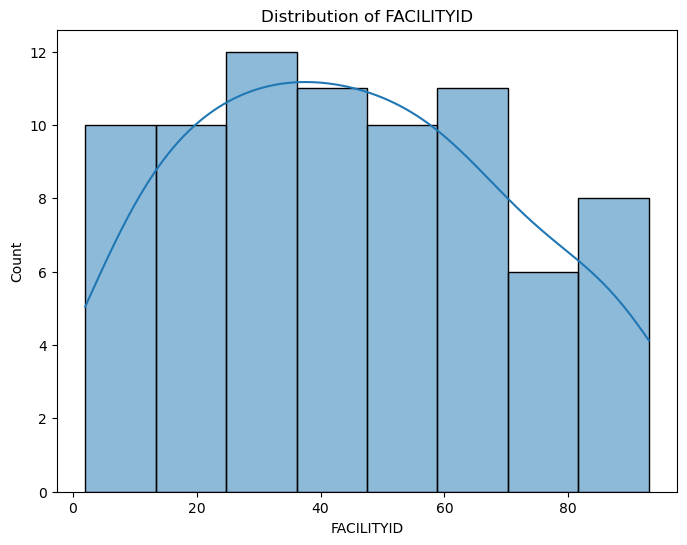

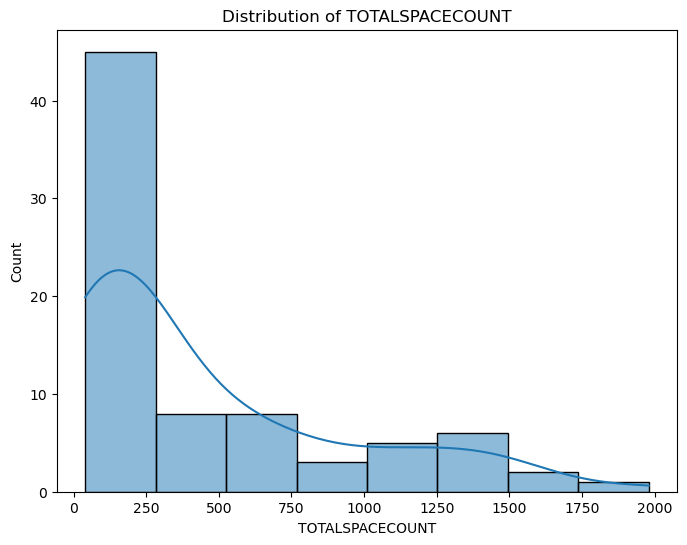

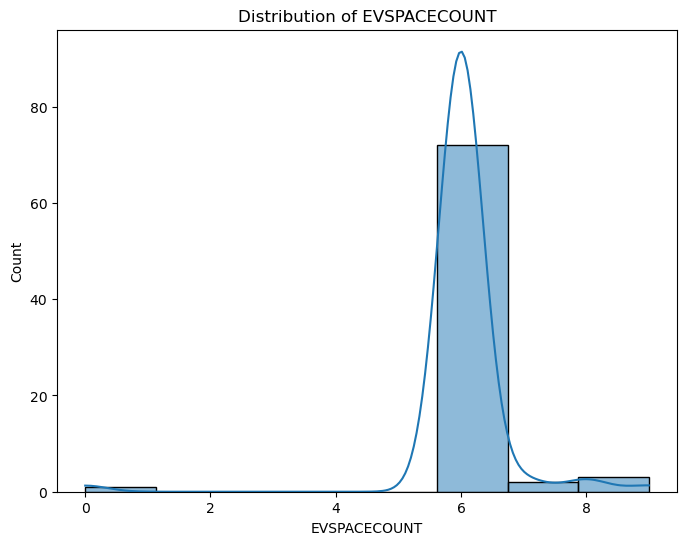

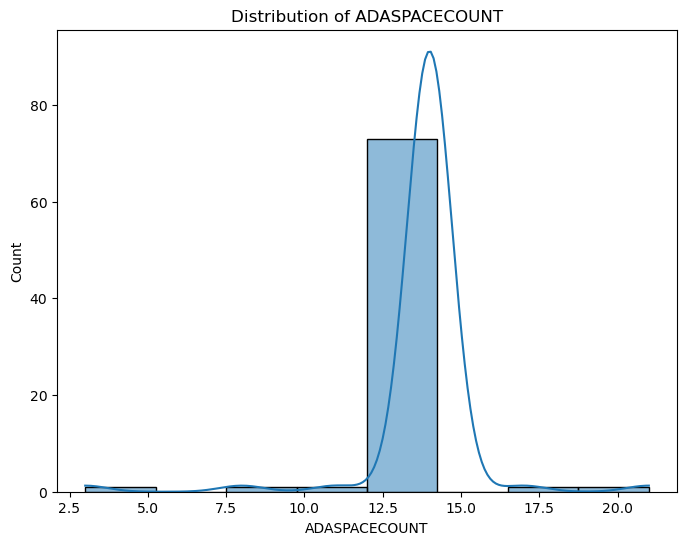

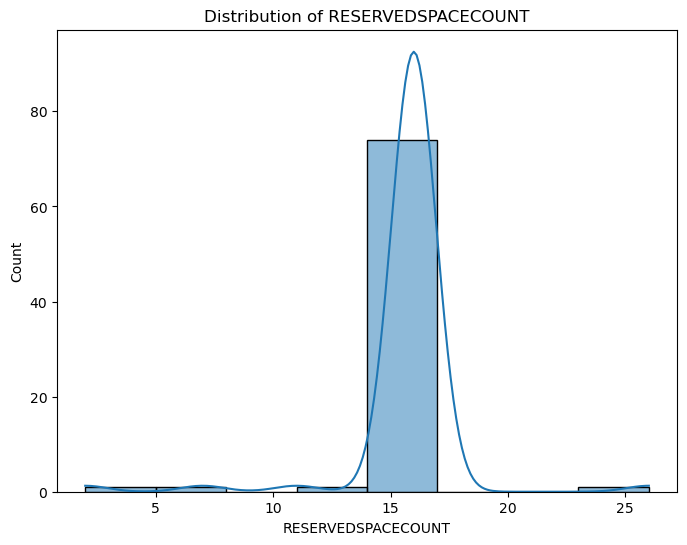

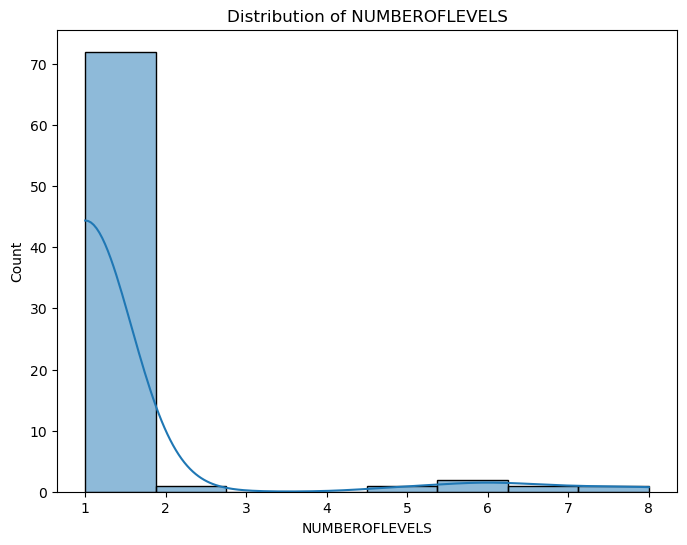

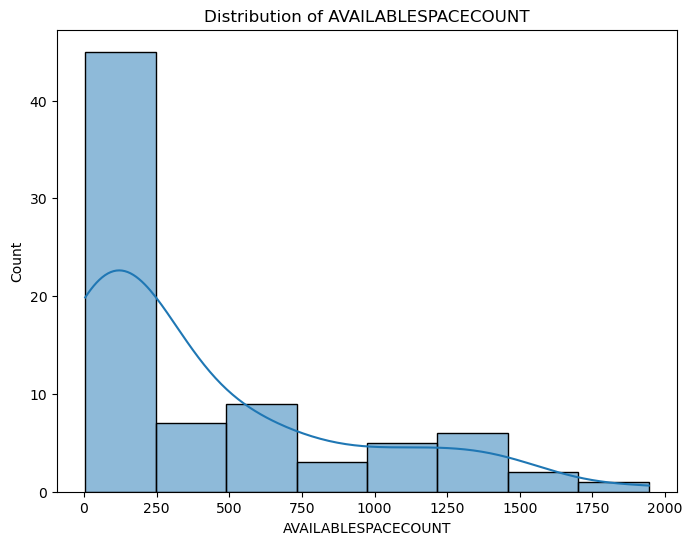

In [9]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

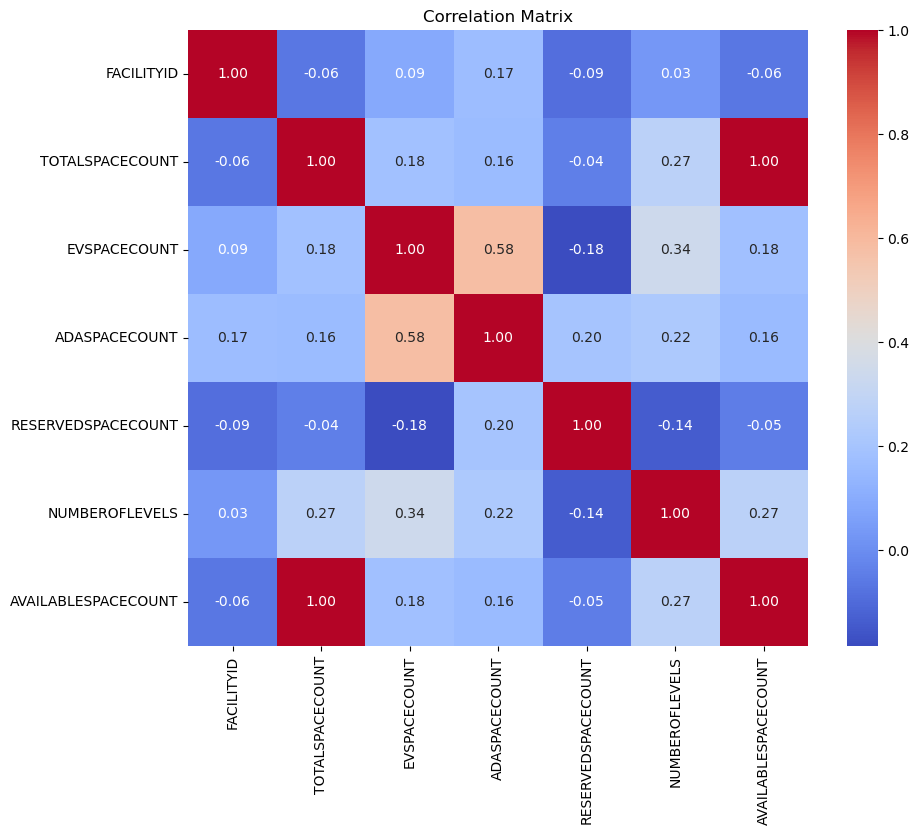

In [10]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Jayesh vala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


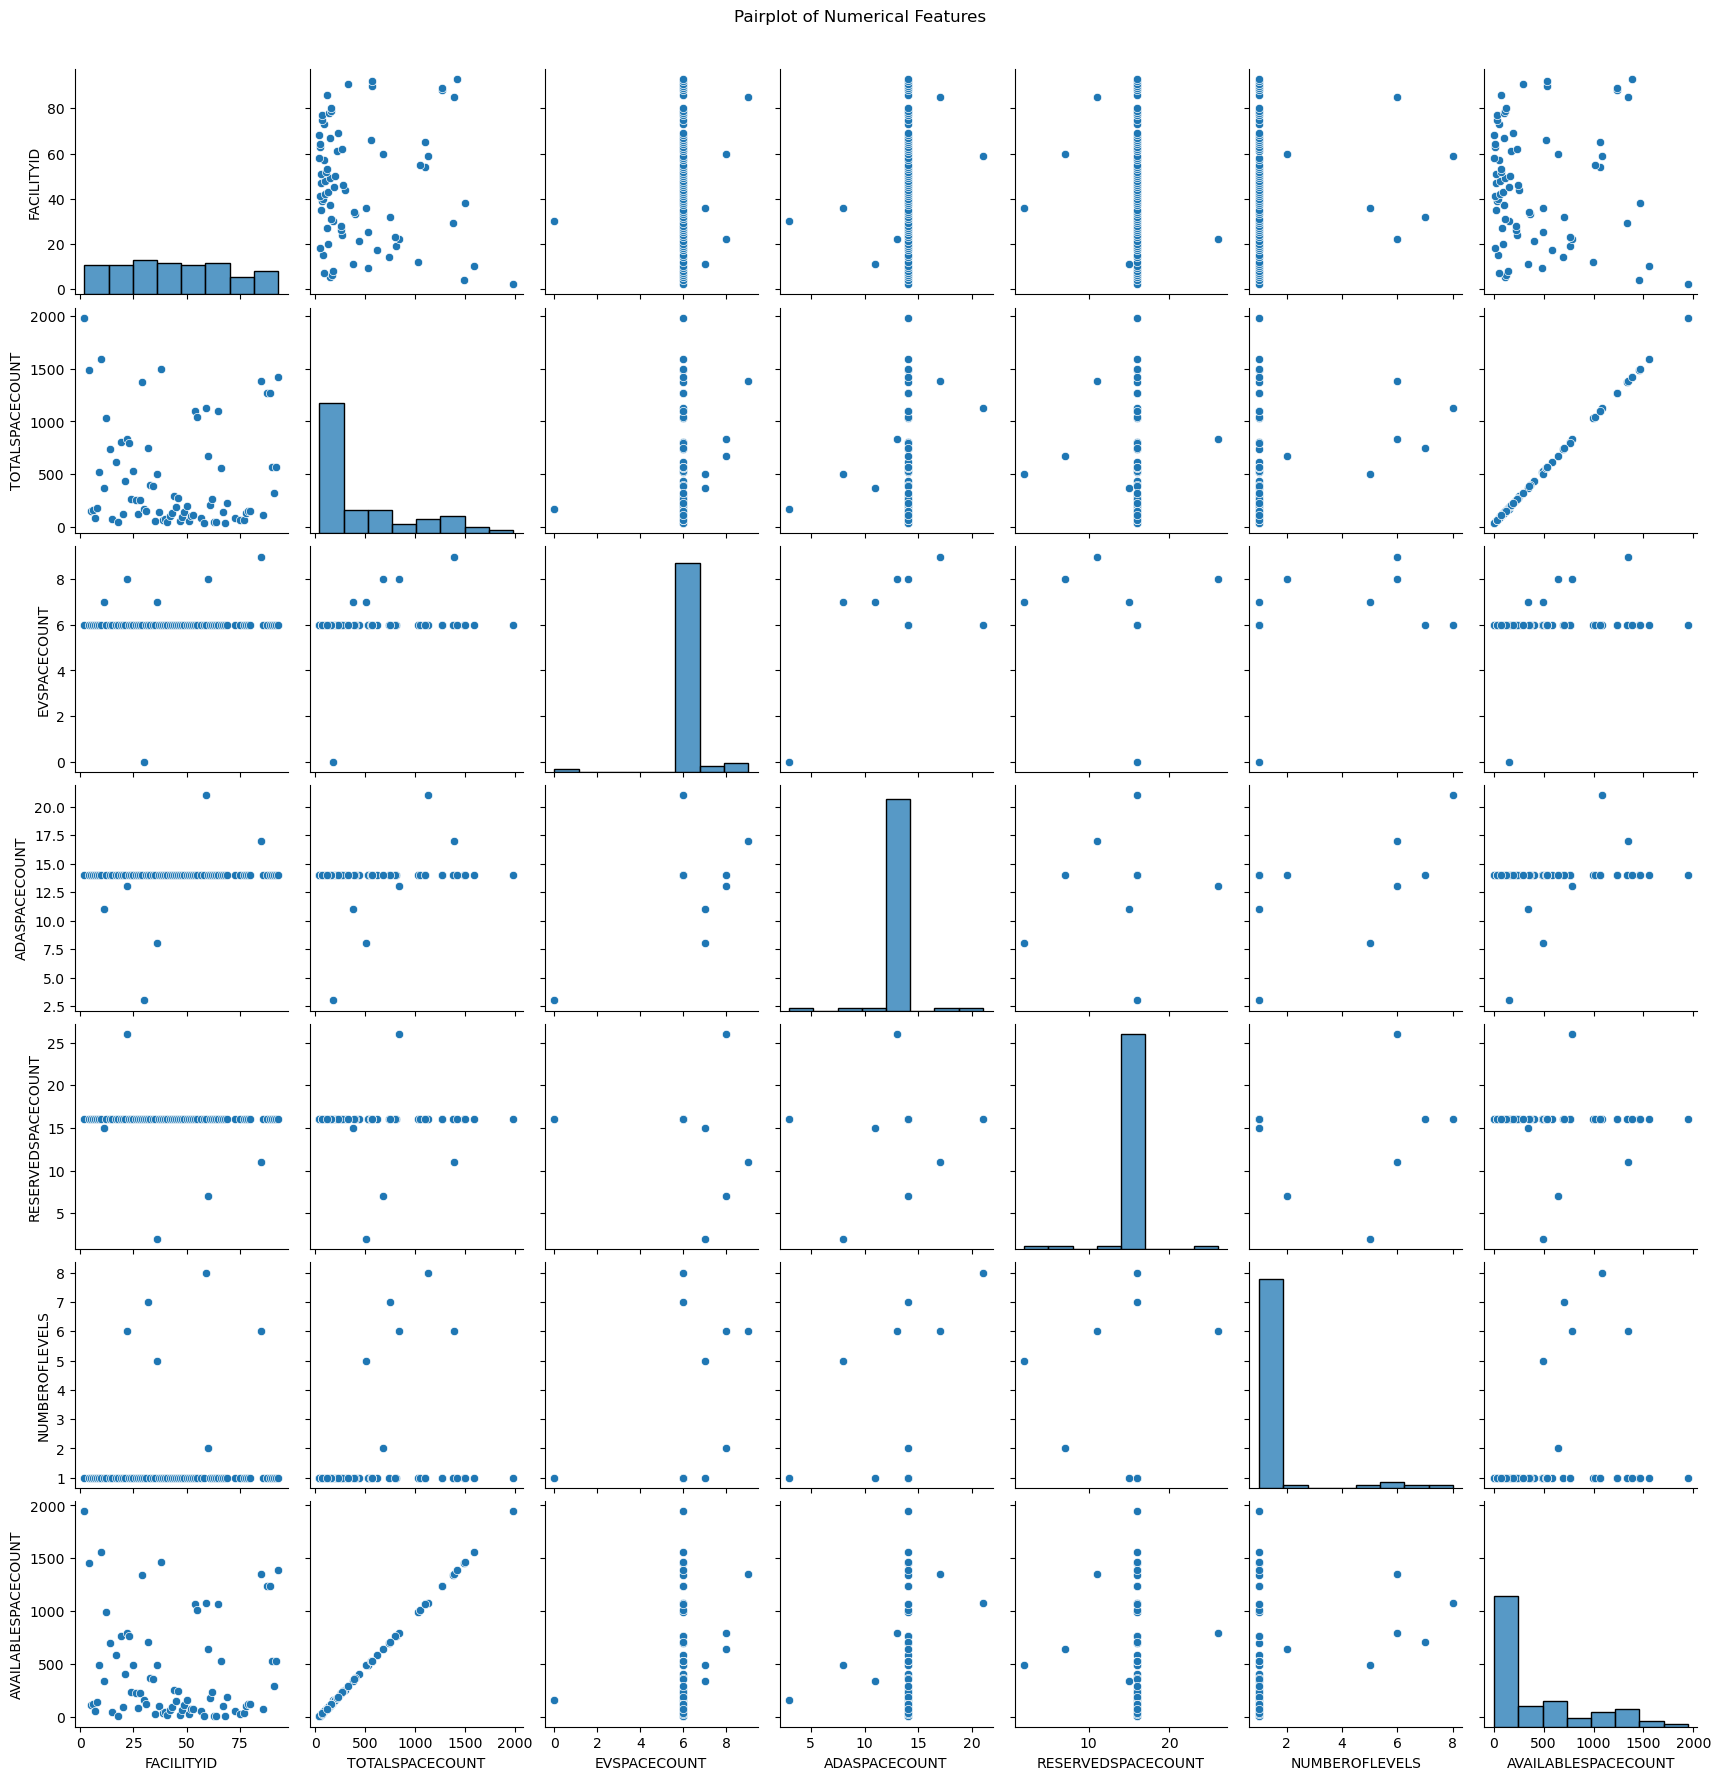

In [11]:
sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

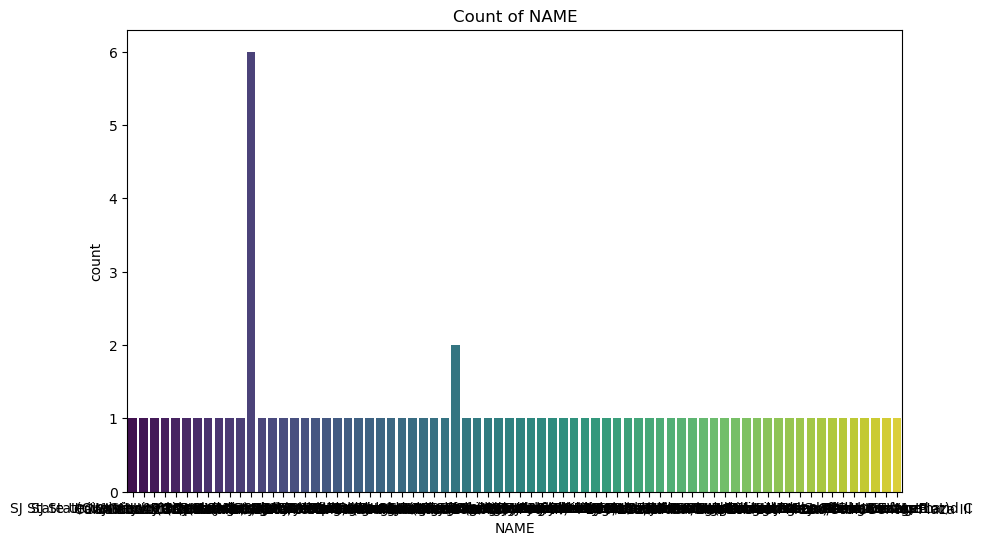

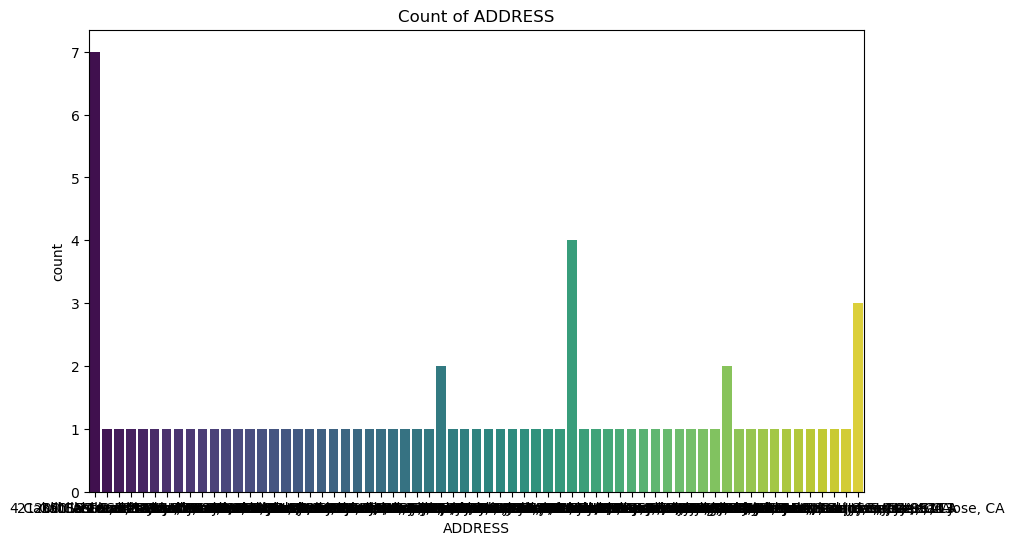

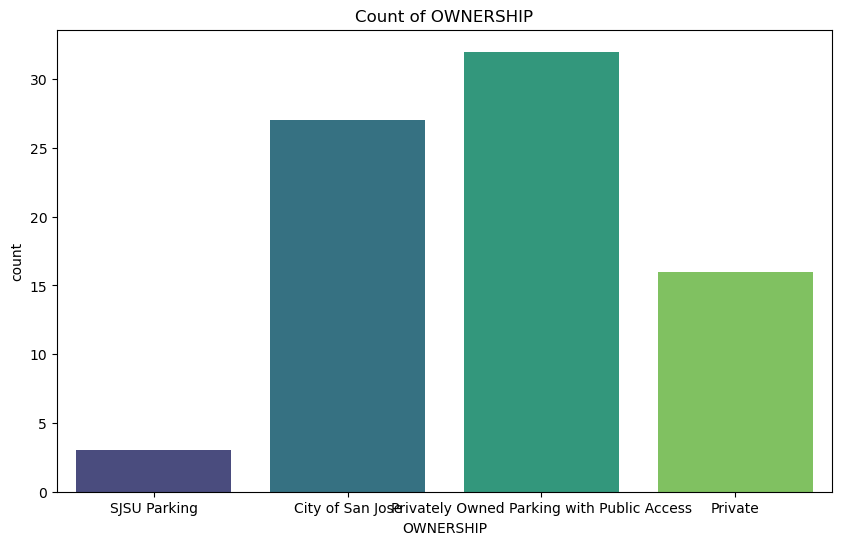

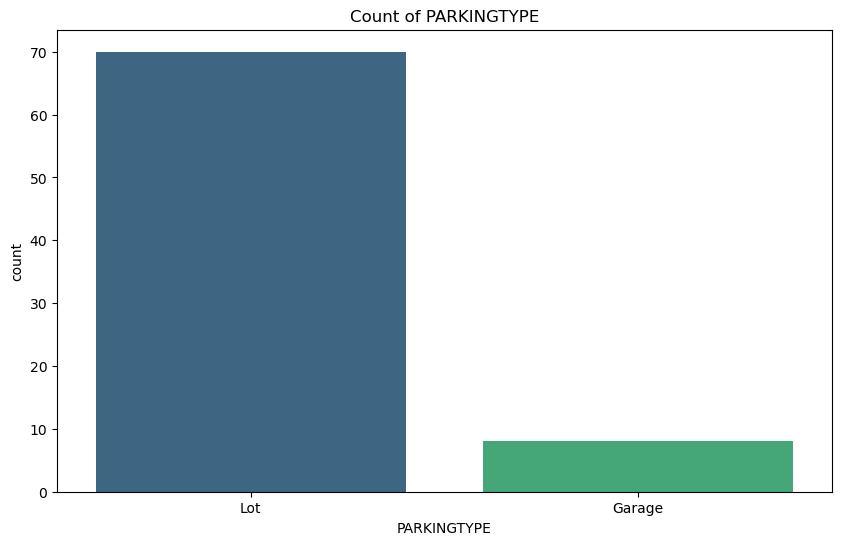

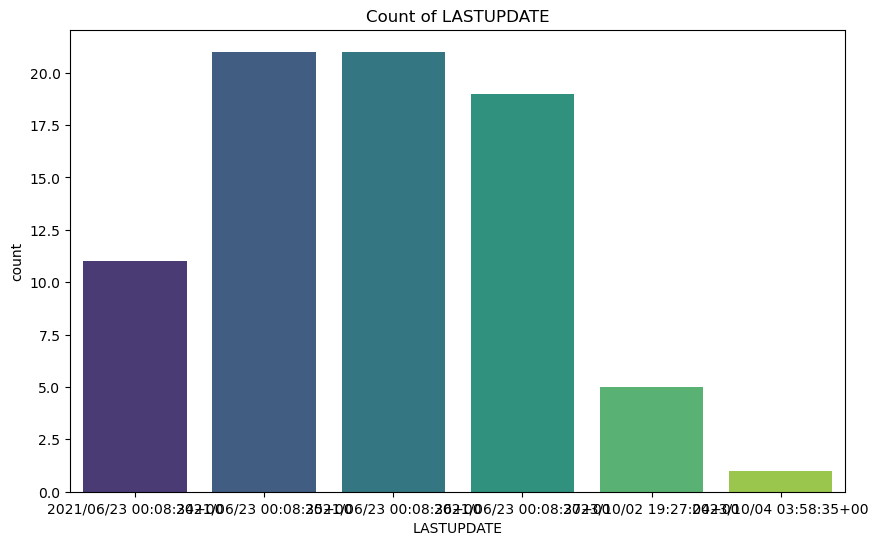

In [12]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, palette="viridis")
    plt.title(f'Count of {feature}')
    plt.show()

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

parking_data = pd.read_csv("updated_data.csv")
target_column = 'AVAILABLESPACECOUNT'
X = parking_data.drop(columns=[target_column, 'NAME', 'ADDRESS','TOTALSPACECOUNT'])
y = parking_data[target_column]

Final_Dataframe = pd.DataFrame({
    'Model': [],
    'Mean Squared Error': [],
    'R-squared': [],
    'RMSE': [],
    'MAPE': []
})
results_list = []
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values for numeric columns
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), numeric_features),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical columns
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)

# Impute missing values in the target variable
y = y.fillna(y.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Append the regression model to the pipeline
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'R-squared', 'RMSE', 'MAPE'])

# Iterate over models
for model_name, model in models:
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = model_pipeline.score(X_test, y_test)
    rmse = np.sqrt(mse)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Store results in the DataFrame
    results_list.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r_squared,
        'RMSE': rmse,
        'MAPE': mape
    })

# Concatenate the list of DataFrames into the Final_Dataframe
Final_Dataframe = pd.concat([Final_Dataframe, pd.DataFrame(results_list)], ignore_index=True)

# Display the results table
Final_Dataframe


,Model,Mean Squared Error,R-squared,RMSE,MAPE
0,Linear Regression,226682.067742,0.377361,476.111403,358.819051
1,Decision Tree Regressor,291600.625000,0.199045,540.000579,215.750601
2,Random Forest Regressor,282821.797575,0.223159,531.809926,243.689864
3,Gradient Boosting Regressor,267850.841978,0.264280,517.543082,241.174442


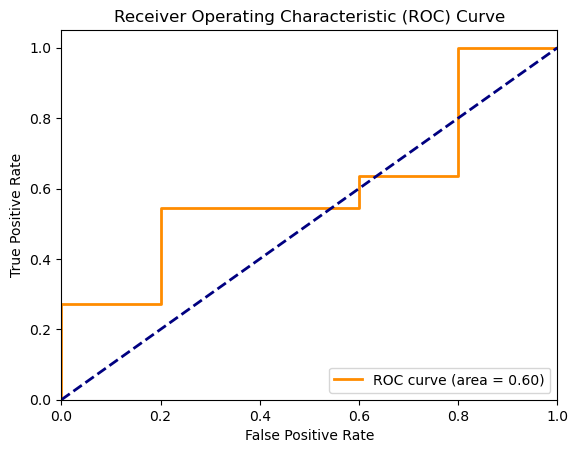

In [16]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Convert regression to binary classification (example: y > threshold)
threshold = 100  
y_binary = (y > threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the linear regression model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


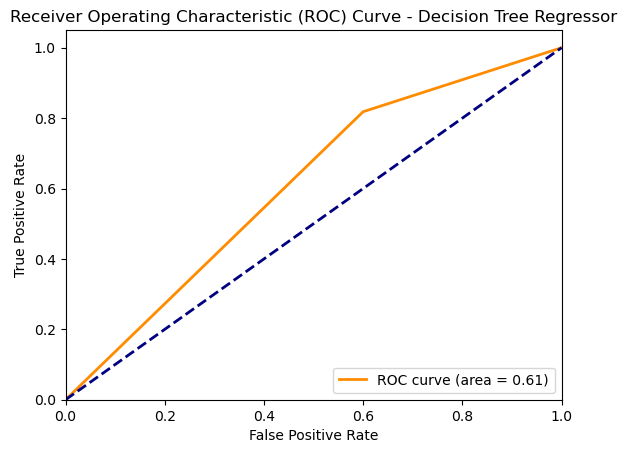

In [17]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the Decision Tree Regressor model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree Regressor')
plt.legend(loc="lower right")
plt.show()


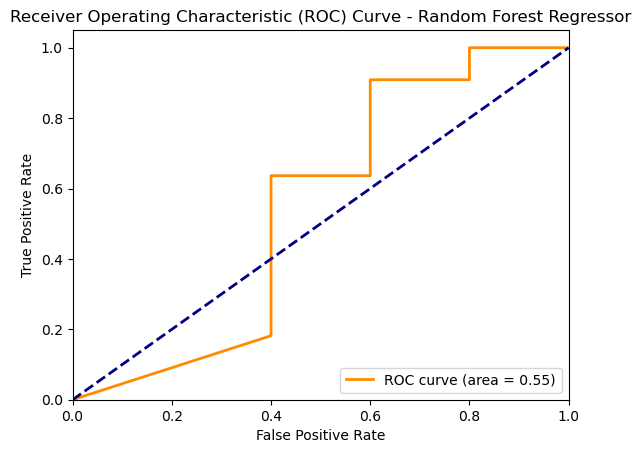

In [18]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the Random Forest Regressor model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Regressor')
plt.legend(loc="lower right")
plt.show()


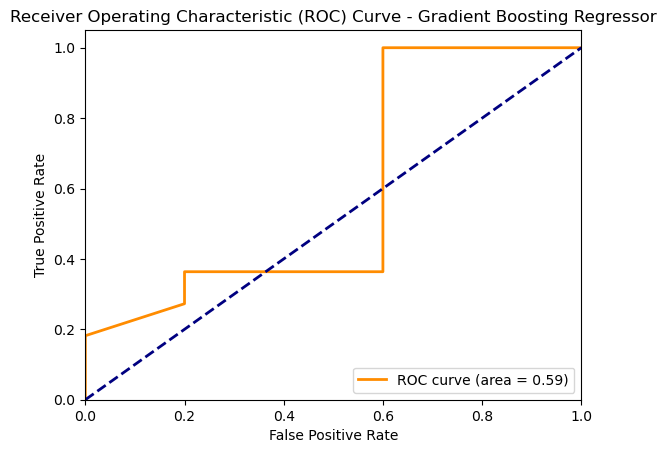

In [19]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the Gradient Boosting Regressor model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting Regressor')
plt.legend(loc="lower right")
plt.show()


In [20]:
# Iterate over models
for model_name, model in models:
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Print the predicted values
    print(f'Predicted values for {model_name}:')
    print(y_pred)
    print('\n')


Predicted values for Linear Regression:
[0.32384583 0.999926   0.2244356  0.83156855 1.12803914 0.58896308
 0.65686985 0.90066377 0.45210696 0.48545585 0.48508586 0.60482216
 0.9999075  0.68891064 0.83179054 0.27655729]


Predicted values for Decision Tree Regressor:
[1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]


Predicted values for Random Forest Regressor:
[0.65 1.   0.19 0.49 0.89 0.78 0.71 1.   0.27 0.34 0.73 0.98 0.96 0.88
 0.98 0.62]


Predicted values for Gradient Boosting Regressor:
[0.85232933 0.98351529 0.04350809 0.20475006 0.50768147 0.63098164
 0.91311295 0.98351529 0.07585145 0.03310002 0.87565711 0.94744918
 0.98220033 1.02256802 0.99209889 0.8580302 ]




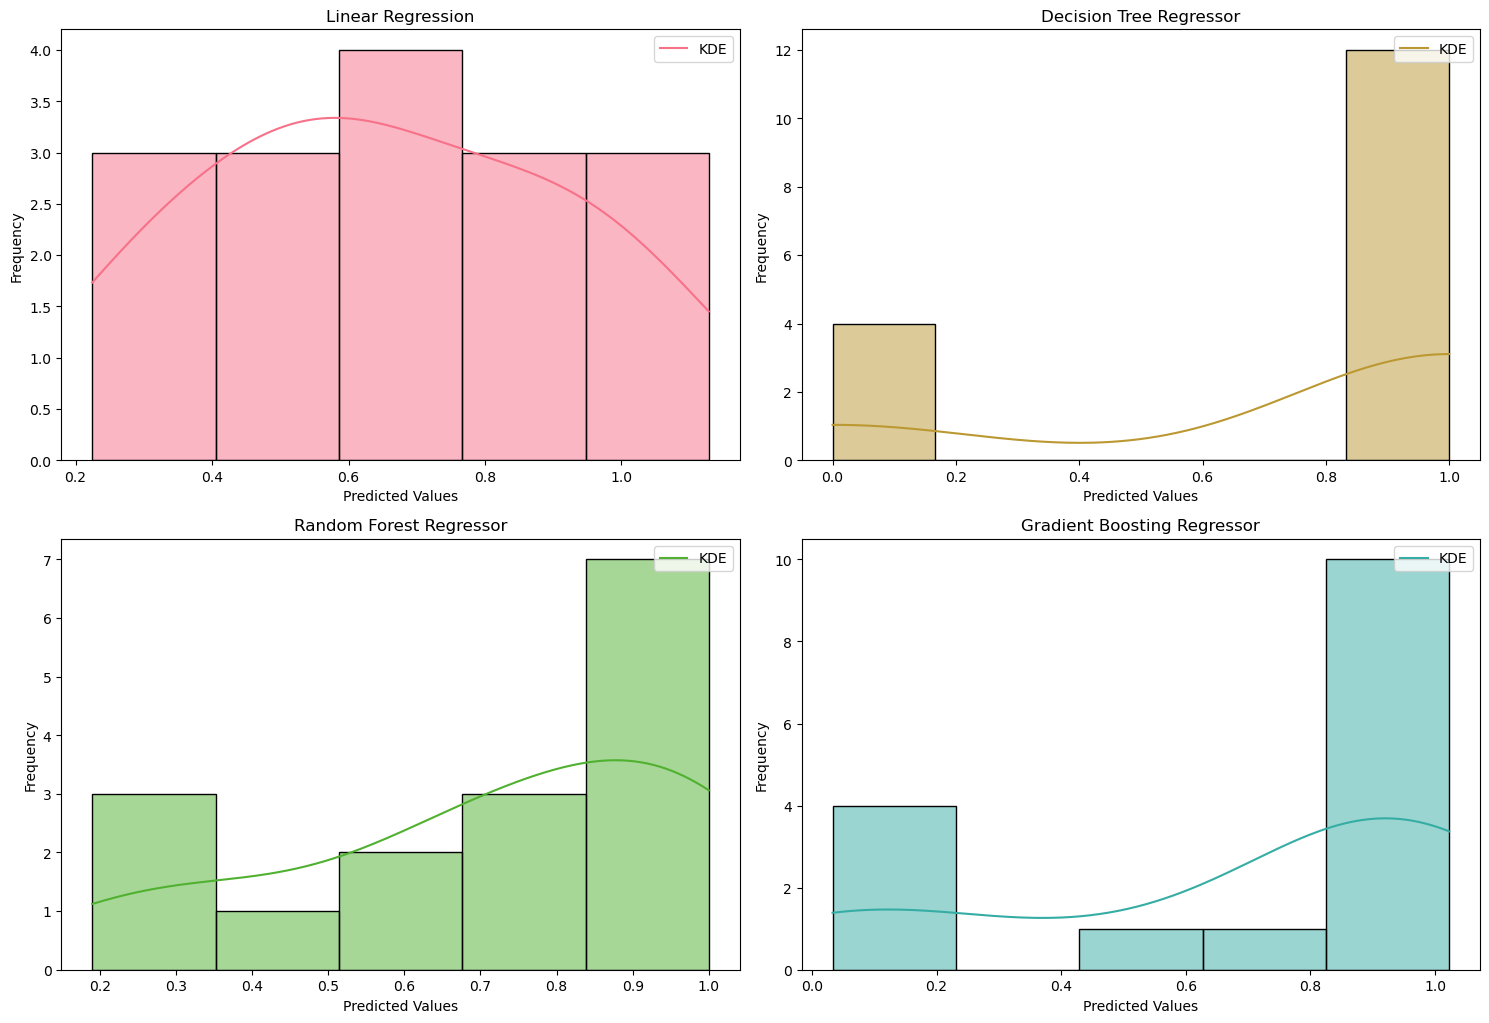

In [21]:
# Create a list to store results dataframes for each model
results_dfs = []

# Plot separate histograms for each model
plt.figure(figsize=(15, 15))  # Increase the figure size for better visibility

for i, (model_name, model) in enumerate(models, start=1):
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Model': model_name})
    results_dfs.append(results_df)

    # Plot histogram for the current model with KDE
    ax = plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots, position i
    sns.histplot(data=results_df, x='Predicted', kde=True, color=sns.color_palette('husl')[i-1], label=f'{model_name[0]} - {model_name[1]}', ax=ax)

    # Add interpretation to x-axis and y-axis
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Values')  # Interpretation for x-axis
    ax.set_ylabel('Frequency')          # Interpretation for y-axis

    # Add legend indicating that the line is KDE
    ax.legend(labels=['KDE'], loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. In the context of a histogram, the KDE line provides a smooth representation of the distribution of the predicted values.

The KDE line shows the estimated probability density of the predicted values. It provides a smoothed version of the histogram, which can be useful for understanding the underlying distribution of the data. The KDE line can give you insights into the shape and characteristics of the distribution, especially in regions where the data may be sparse or where there are gaps between histogram bins.

In summary, the KDE line in the histograms shows continuous and smoothed representation of the distribution of the predicted values, providing additional information beyond what is visible in the histogram bars.

In [22]:
# Display the results table
print(Final_Dataframe)

# Model Comparison
best_model_mse = Final_Dataframe.loc[Final_Dataframe['Mean Squared Error'].idxmin()]
best_model_rmse = Final_Dataframe.loc[Final_Dataframe['RMSE'].idxmin()]
best_model_r_squared = Final_Dataframe.loc[Final_Dataframe['R-squared'].idxmax()]
best_model_mape = Final_Dataframe.loc[Final_Dataframe['MAPE'].idxmin()]

print("\nModel Comparison:")
print("Best Model (Minimum MSE):")
print(best_model_mse)

print("\nBest Model (Minimum RMSE):")
print(best_model_rmse)

print("\nBest Model (Maximum R-squared):")
print(best_model_r_squared)

print("\nBest Model (Minimum MAPE):")
print(best_model_mape)


                         Model  Mean Squared Error  R-squared        RMSE  \
0            Linear Regression       226682.067742   0.377361  476.111403   
1      Decision Tree Regressor       291600.625000   0.199045  540.000579   
2      Random Forest Regressor       282821.797575   0.223159  531.809926   
3  Gradient Boosting Regressor       267850.841978   0.264280  517.543082   

         MAPE  
0  358.819051  
1  215.750601  
2  243.689864  
3  241.174442  

Model Comparison:
Best Model (Minimum MSE):
Model                 Linear Regression
Mean Squared Error        226682.067742
R-squared                      0.377361
RMSE                         476.111403
MAPE                         358.819051
Name: 0, dtype: object

Best Model (Minimum RMSE):
Model                 Linear Regression
Mean Squared Error        226682.067742
R-squared                      0.377361
RMSE                         476.111403
MAPE                         358.819051
Name: 0, dtype: object

Best Model (Ma

In [23]:
import pickle
from sklearn.pipeline import Pipeline

# Linear Regression model
lr_model = LinearRegression()

# Full pipeline including preprocessing
lr_full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lr_model)
])

# Train the model
lr_full_pipeline.fit(X_train, y_train)

# Save the model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_full_pipeline, model_file)

print("Linear Regression model saved successfully.")



Linear Regression model saved successfully.
